## Task

1. Define a basic ODE model (e.g., Newton's Law of Cooling or Population Growth).
2. Use `sympy` to apply separation of variables.
3. Determine the general and particular solutions.
4. Plot the results for different initial conditions.

# Newton's Law of Cooling Example

$$ \frac{dT}{dt} = -k(T - T_{env}) $$

## Algebraic solution

$$ \frac{dT}{T - T_{env}} = -k dt $$
$$ \int \frac{dT}{T - T_{env}} = \int -k dt $$
$$ \ln|T - T_{env}| = -kt + C $$
$$ T(t) = T_{env} + Ce^{-kt} $$



In [107]:
import numpy as np
from numpy.typing import ArrayLike, NDArray
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

## Step by step solution

In [93]:
t, T, T_env, k, t0, T0 = sp.symbols("t T T_env k t0 T0", real=True)

# Equation: dT/dt = -k * (T - T_env)
# Separating variables gives: 1/(T - T_env) dT = -k dt

# LHS integrand (function of T)
lhs_integrand = 1 / (T - T_env)
# RHS integrand (function of t)
rhs_integrand = -k

# Integrate both sides
lhs_integral = sp.integrate(lhs_integrand, T)
rhs_integral = sp.integrate(rhs_integrand, t)

# Add constant of integration
C1 = sp.Symbol("C1")
rhs_integral += C1

# Integrated equation
eq = sp.Eq(lhs_integral, rhs_integral)

# Solve for T
T_solution = sp.solve(eq, T)[0]
print("General Solution for T:")
print(T_solution)

General Solution for T:
T_env + exp(C1 - k*t)


In [95]:
# Apply initial condition T(0) = T0
C1_value = sp.solve(T_solution.subs(t, t0) - T0, C1)[0]
T_particular = T_solution.subs(C1, C1_value)
print(f"Particular Solution with T(0)={T0}:")
print(T_particular)

Particular Solution with T(0)=T0:
T_env + (T0 - T_env)*exp(-k*t + k*t0)


In [96]:
T_env = 25.0  # Ambient temperature in degrees Celsius
k = 0.1  # Cooling constant

t0 = 0
T0 = 50

## Streamlined symbolic Solution with `sympy`

In [97]:
t = sp.Symbol("t")
T = sp.Function("T")(t)
eq = sp.Eq(sp.Derivative(T, t), -k * (T - T_env))

print("Differential equation:")
print(eq)

Differential equation:
Eq(Derivative(T(t), t), 2.5 - 0.1*T(t))


### General Solution

In [98]:
sol = sp.dsolve(eq)

print("General symbolic solution for T(t):")
print(sol)

General symbolic solution for T(t):
Eq(T(t), C1*exp(-0.1*t) + 25.0)


### Particular Solution

In [99]:
initial_conditions = {T.subs(t, t0): T0}
sol = sp.dsolve(eq, T, ics=initial_conditions)
sol = sol.simplify()

print(f"Particular symbolic solution for T(t) with T(0)={T0}:")
print(sol)

Particular symbolic solution for T(t) with T(0)=50:
Eq(T(t), 25.0 + 25.0*exp(-0.1*t))


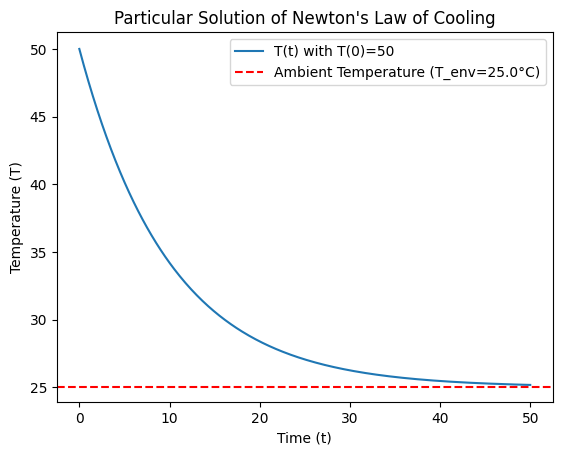

In [102]:
t_values = np.linspace(0, 50, 400)
T_lam = sp.lambdify(t, sol.rhs, "numpy")
T_values = T_lam(t_values)

plt.plot(t_values, T_values, label=f"T(t) with T(0)={T0}")
plt.axhline(
    T_env, color="red", linestyle="--", label=f"Ambient Temperature (T_env={T_env}°C)"
)

plt.title("Particular Solution of Newton's Law of Cooling")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.show()

## Phase portait

In [101]:
def system(
    t: ArrayLike,
    T: ArrayLike,
    T_env: float = 25.0,
    k: float = 0.1,
) -> tuple[NDArray, NDArray]:
    dt = np.ones_like(t)  # Time derivative of t is 1
    dT = -k * (T - T_env)
    return dt, dT

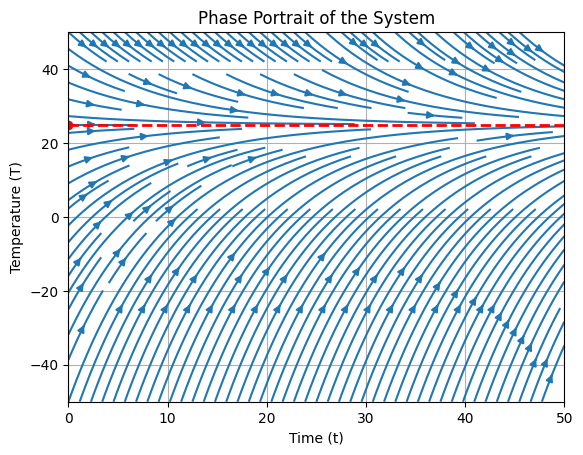

In [75]:
plt.figure()

t_values = np.linspace(0, 50, 400)
T_values = np.linspace(-50, 50, 400)

t_values, T_values = np.meshgrid(t_values, T_values)
dt, dT = system(t_values, T_values)

plt.streamplot(
    t_values,
    T_values,
    dt,
    dT,
    density=1.5,
)

plt.axhline(y=T_env, color="red", linestyle="--", linewidth=2)

fixed_point = (0, T_env)
plt.plot(*fixed_point, "ro", label="Fixed Point")

plt.title("Phase Portrait of the System")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")

plt.grid()


## Numerical solution

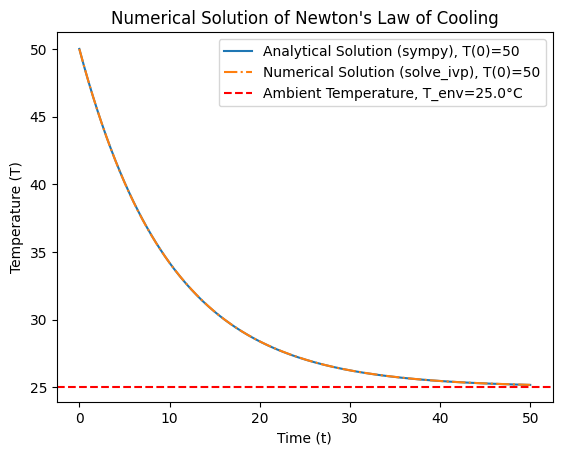

In [120]:
def ode_func(T, t, T_env=25.0, k=0.1):
    dTdt = -k * (T - T_env)
    return dTdt


T_values_num2 = solve_ivp(
    lambda t, T: ode_func(T, t, T_env, k),
    [t_values[0], t_values[-1]],
    [T0],
    t_eval=t_values,
).y.flatten()

plt.plot(t_values, T_values, label=f"Analytical Solution (sympy), T(0)={T0}")
plt.plot(
    t_values,
    T_values_num2,
    linestyle="-.",
    label=f"Numerical Solution (solve_ivp), T(0)={T0}",
)
plt.axhline(
    T_env, color="red", linestyle="--", label=f"Ambient Temperature, T_env={T_env}°C"
)
plt.title("Numerical Solution of Newton's Law of Cooling")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")

plt.legend()
